# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [38]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import img_as_bool
from skimage import io 
from skimage import morphology
from skimage.transform import rescale
from skimage.morphology import disk, rectangle
from skimage.filters.rank import otsu
from skimage import filters
from skimage.draw import circle_perimeter 
from skimage import measure



Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

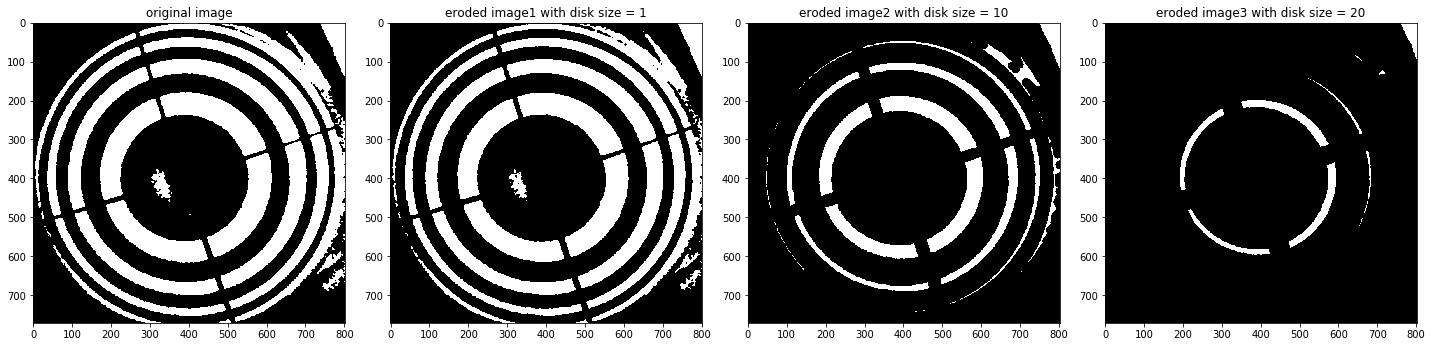

In [5]:
filename = './images/FindingContours.png'
cont_im = io.imread(filename)

fig = plt.figure(figsize=(20, 20))

plt.subplot(141)
io.imshow(cont_im)
plt.title('original image')

eros_cont1 = morphology.erosion(cont_im, disk(1))
plt.subplot(142)
io.imshow(eros_cont1)
plt.title('eroded image1 with disk size = 1')

eros_cont2 = morphology.erosion(cont_im, disk(10))
plt.subplot(143)
io.imshow(eros_cont2)
plt.title('eroded image2 with disk size = 10')

eros_cont3 = morphology.erosion(cont_im, disk(20))
plt.subplot(144)
io.imshow(eros_cont3)
plt.title('eroded image3 with disk size = 20');


** Q.1.2 Dilation **

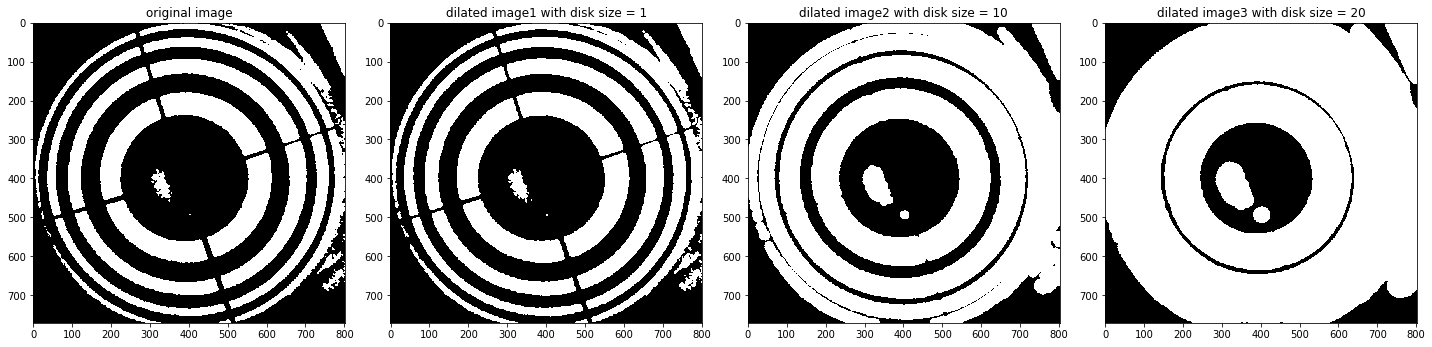

In [6]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(141)
io.imshow(cont_im)
plt.title('original image')

dila_cont1 = morphology.dilation(cont_im, disk(1))
plt.subplot(142)
io.imshow(dila_cont1)
plt.title('dilated image1 with disk size = 1')

dila_cont2 = morphology.dilation(cont_im, disk(10))
plt.subplot(143)
io.imshow(dila_cont2)
plt.title('dilated image2 with disk size = 10')

dila_cont3 = morphology.dilation(cont_im, disk(20))
plt.subplot(144)
io.imshow(dila_cont3)
plt.title('dilated image3 with disk size = 20');

** Q.1.3 Opening **

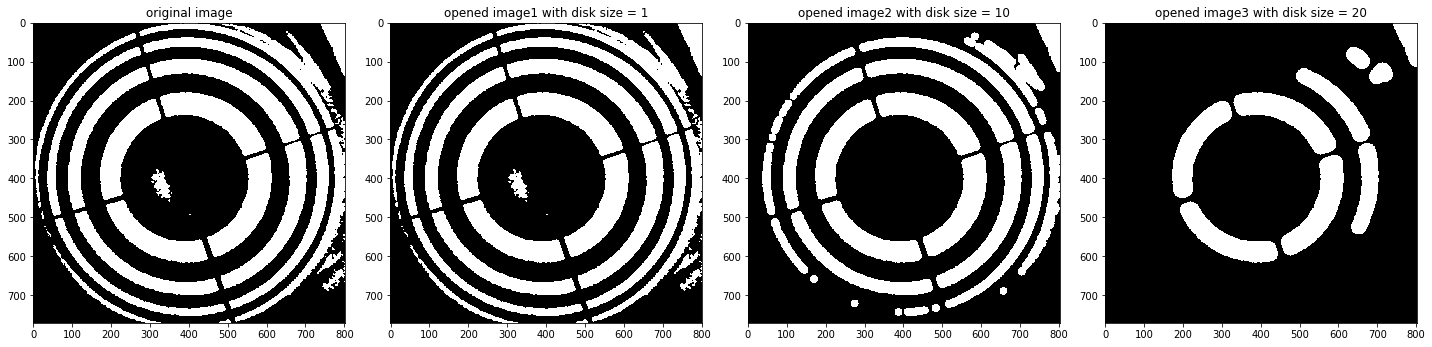

In [73]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(141)
io.imshow(cont_im)
plt.title('original image')

open_cont1 = morphology.opening(cont_im, disk(1))
plt.subplot(142)
io.imshow(open_cont1)
plt.title('opened image1 with disk size = 1')

open_cont2 = morphology.opening(cont_im, disk(10))
plt.subplot(143)
io.imshow(open_cont2)
plt.title('opened image2 with disk size = 10')

open_cont3 = morphology.opening(cont_im, disk(20))
plt.subplot(144)
io.imshow(open_cont3)
plt.title('opened image3 with disk size = 20');

** Q.1.4 Closing**

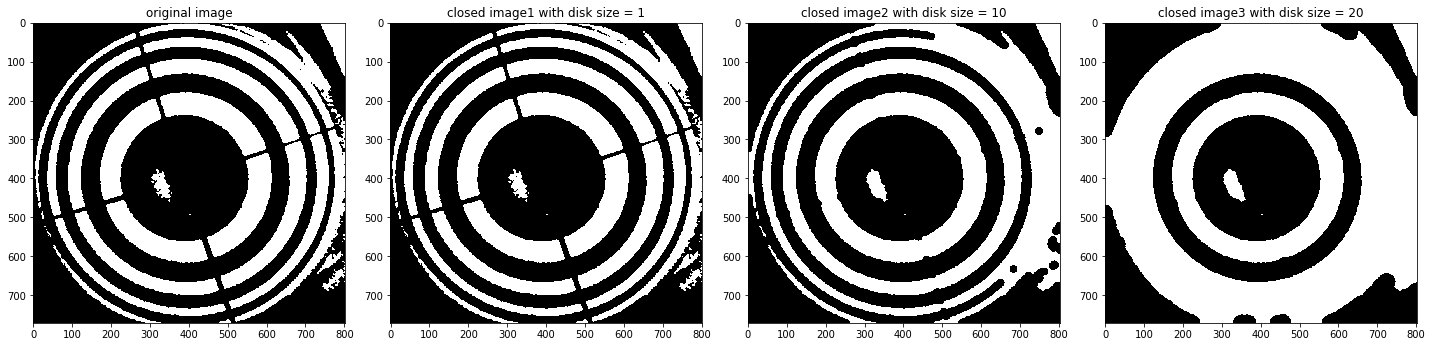

In [75]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(141)
io.imshow(cont_im)
plt.title('original image')

close_cont1 = morphology.closing(cont_im, disk(1))
plt.subplot(142)
io.imshow(close_cont1)
plt.title('closed image1 with disk size = 1')

close_cont2 = morphology.closing(cont_im, disk(10))
plt.subplot(143)
io.imshow(close_cont2)
plt.title('closed image2 with disk size = 10')

close_cont3 = morphology.closing(cont_im, disk(20))
plt.subplot(144)
io.imshow(close_cont3)
plt.title('closed image3 with disk size = 20');

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

All these operations are morphological operations in the image processing, dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries using some structuring element. The opening and closing are the combinations of the erosion and dilation operations. The opening operation is an erosion followed by a dilation, using the same structuring element for both operations. whereas the closing operation is a dilation followed by an erosion.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


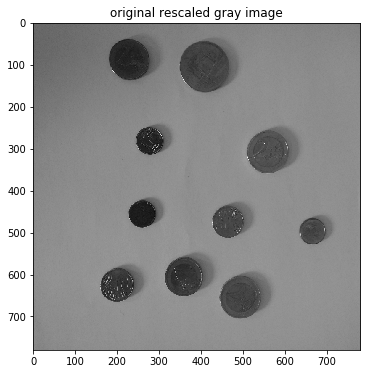

In [9]:
filename = './images/coins.jpg'
coins_im = rescale(io.imread(filename, as_grey=True), .25)
coins_uim = img_as_ubyte(coins_im)


fig = plt.figure(figsize=(20, 20))
plt.subplot(142)
io.imshow(coins_uim)
plt.title('original rescaled gray image');




**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

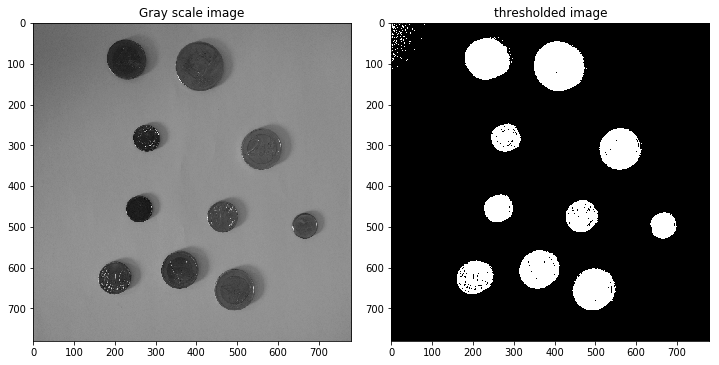

In [12]:
th = filters.threshold_otsu(coins_uim)
coins_th = coins_uim <= th

fig = plt.figure(figsize=(20, 20))
plt.subplot(141)
io.imshow(coins_uim)
plt.title('Gray scale image');

plt.subplot(142)
io.imshow(coins_th)
plt.title('thresholded image');



**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

Text(0.5,1,'cleaned image')

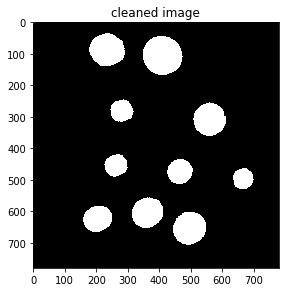

In [102]:
clear_im = morphology.opening(coins_th, disk(1))
clear_im = morphology.erosion(clear_im, disk(2))
clear_im = morphology.dilation(clear_im, disk(3))
clear_im = morphology.closing(clear_im, disk(10))
io.imshow(clear_im)
plt.title('cleaned image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


regions number= 11
radius of circle 1 = 54
area of circle 1 = 9272
radius of circle 2 = 63
area of circle 2 = 12433
radius of circle 3 = 36
area of circle 3 = 4153
radius of circle 4 = 52
area of circle 4 = 8579
radius of circle 5 = 36
area of circle 5 = 4093
radius of circle 6 = 40
area of circle 6 = 5152
radius of circle 7 = 33
area of circle 7 = 3476
radius of circle 8 = 49
area of circle 8 = 7709
radius of circle 9 = 44
area of circle 9 = 6078
radius of circle 10 = 52
area of circle 10 = 8763


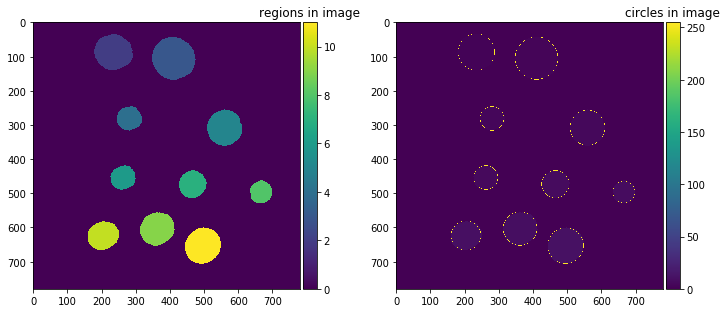

In [100]:
im_label =measure.label(clear_im)
regions= measure.regionprops(im_label)

fig = plt.figure(figsize=(10,10))
plt.subplot (121)
io.imshow(im_label)
plt.title('regions in image')

print('regions number= {}'.format(len(regions)))

for idx, region in enumerate (regions):
    if idx == 0:
        continue
    radius = region.equivalent_diameter / 2.
    print('radius of circle {:.0f} = {:.0f}'.format(idx, radius))
    print('area of circle {:.0f} = {:.0f}'.format(idx,region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    im_label[circle_coord[0], circle_coord[1]] = 255

plt.subplot(122)
io.imshow(im_label)
plt.title('circles in image');

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

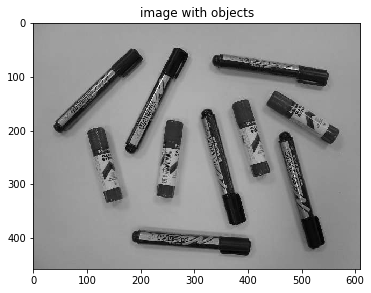

In [26]:
filename = './images/objets4.jpg'
objects_im = io.imread(filename, as_grey=True)

io.imshow(objects_im)
plt.title('image with objects');

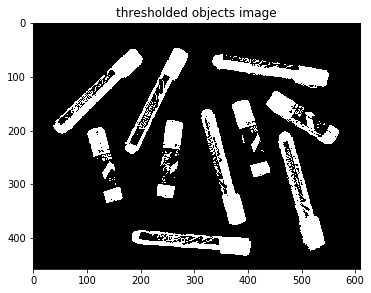

In [101]:
th = filters.threshold_otsu(objects_im)
objects_th = objects_im <= th 
io.imshow(objects_thresh)
plt.title('thresholded objects image');


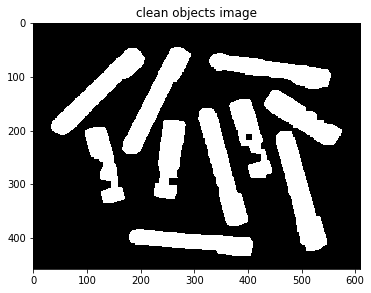

In [83]:
clean_im = morphology.dilation(objects_th, rectangle(5,10))
clean_im = morphology.erosion(clean_im, rectangle(3,5))
clean_im = morphology.dilation(clean_im, rectangle(1,5))
clean_im = morphology.opening(clean_im, rectangle(1,5))
clean_im = morphology.closing(clean_im, rectangle(10,10))
io.imshow(clean_im)
plt.title('clean objects image');


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


regions number = 10


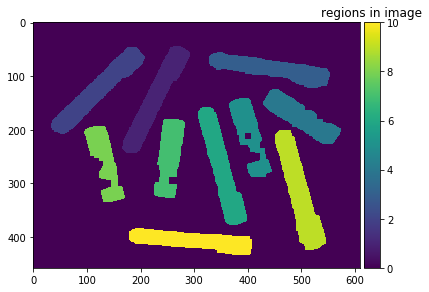

In [87]:
im_label = measure.label(clean_im)
regions = measure.regionprops(im_label)

io.imshow(im_label)
plt.title('regions in image')

print('regions number = {}'.format(len(regions)));

In [94]:
marker = 0; glue = 0;

for idx, reg in enumerate (regions):
    major_axis = reg.major_axis_length
    if major_axis > 200:
        marker = marker + 1
        print('length of marker {:.0f} = {:.0f}'.format(marker, major_axis))       
    else:
        glue = glue + 1
        print('length of glue stick {:.0f} = {:.0f}'.format(glue, major_axis))
        
print('Total markers =  {}'.format(marker))
print('Total glue sticks =  {}'.format(glue))

length of marker 1 = 255
length of marker 2 = 250
length of marker 3 = 261
length of glue stick 1 = 174
length of glue stick 2 = 178
length of marker 4 = 262
length of glue stick 3 = 170
length of glue stick 4 = 174
length of marker 5 = 264
length of marker 6 = 267
Total markers =  6
Total glue sticks =  4
